In [1]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
from src import data_tools
from src import constants, pca_tools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("colorblind")
sns.set_context("poster")
sc.settings.figdir= "./figures/figure4/"
sc.settings.dpi_save = 300
from src import constants

In [2]:
adata = ad.read_h5ad("../data/anndata/hodge.h5ad")
adata

AnnData object with n_obs × n_vars = 4164 × 50281
    obs: 'sample_id', 'sample_type', 'organism', 'donor', 'sex', 'age_days', 'brain_hemisphere', 'brain_region', 'brain_subregion', 'facs_date', 'facs_container', 'facs_sort_criteria', 'rna_amplification_set', 'library_prep_set', 'library_prep_avg_size_bp', 'seq_name', 'seq_tube', 'seq_batch', 'total_reads', 'percent_exon_reads', 'percent_intron_reads', 'percent_intergenic_reads', 'percent_rrna_reads', 'percent_mt_exon_reads', 'percent_reads_unique', 'percent_synth_reads', 'percent_ecoli_reads', 'percent_aligned_reads_total', 'complexity_cg', 'genes_detected_cpm_criterion', 'genes_detected_fpkm_criterion', 'class', 'cluster'

In [3]:
adata.var_names

Index(['3.8-1.2', '3.8-1.3', '3.8-1.4', '3.8-1.5', '5-ht3c2', 'A1bg',
       'A1bg-as1', 'A1cf', 'A2m', 'A2m-as1',
       ...
       'Zxdb', 'Zxdc', 'Zyg11a', 'Zyg11ap1', 'Zyg11b', 'Zyx', 'Zzef1', 'Zzz3',
       'ba255a11.4', 'ba395l14.12'],
      dtype='object', length=50281)

In [7]:
shared_genes = np.loadtxt("../results/gene_lists/shared_genes.txt", dtype=str)
adata = adata[:,shared_genes]

In [8]:
sc.pp.normalize_total(adata, target_sum=constants.NORMALIZE_TARGET_SUM)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes = constants.NUM_HVG_GENES)
sc.pp.pca(adata, constants.NUM_PCS)

/home/joram/mambaforge/envs/snakemake/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [11]:
adata.obsm["X_pca"][:,0] *= -1

/home/joram/mambaforge/envs/snakemake/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


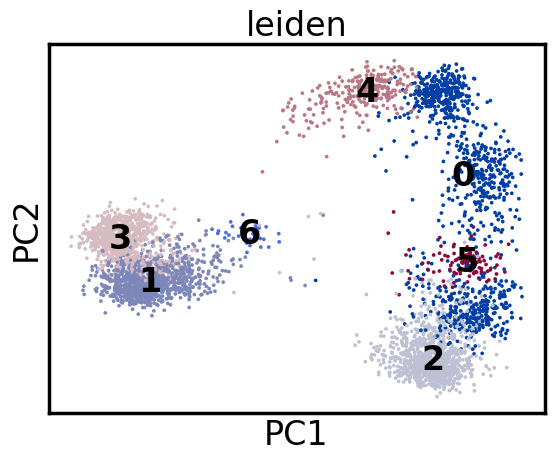

In [18]:
sc.pp.neighbors(adata)
sc.tl.leiden(adata, resolution=.05)
sc.pl.pca(adata, color='leiden', legend_loc='on data', save="_hodge_leiden.png")

In [19]:
np.unique(adata.obs['leiden'])

array(['0', '1', '2', '3', '4', '5', '6'], dtype=object)

In [33]:
equiv = {"0":"Pvalb", "8":"Pvalb",
        "2":"Sst", "7":"Sst",
        "3": "Lamp5", "4": "Vip", "6":"Lamp5",
        "1": "Vip", "5": "Vip"}
adata.obs['Subclass'] = adata.obs['leiden'].map(equiv)
adata.obs['Subclass'] = adata.obs['Subclass'].astype("category")

In [14]:
sns.set_palette("colorblind")

In [34]:
adata.obs['Subclass'] = adata.obs['Subclass'].cat.reorder_categories(['Pvalb', 'Sst',  'Lamp5', 'Vip'])  

/home/joram/mambaforge/envs/snakemake/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


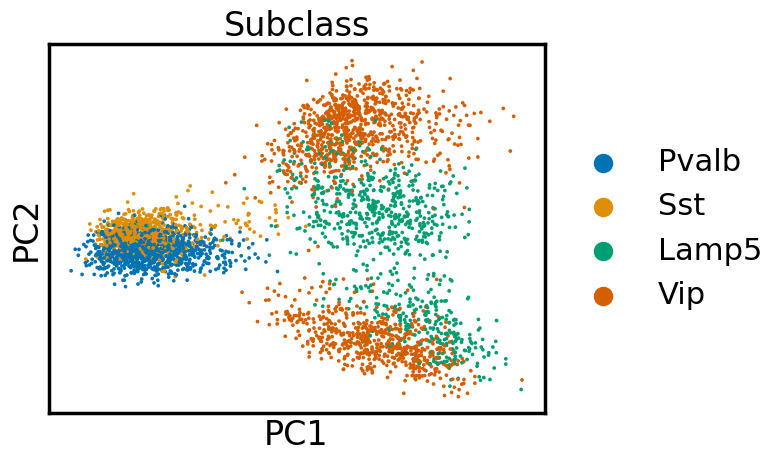

In [35]:
sc.pl.pca(adata, color='Subclass')#, legend_loc='on data')